# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the emSecondpirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





# Question 1
WN
$\newline$
$\forall t \in N, E(Z_t)=0$ 
$\newline$
$Cov(Z_t,Z_{t+h})=0 \; if \; h \neq 0$ else $Cov(Z_t;Z_t)=\sigma ^2$, because of the indepenance of hte variables

Second
$\newline$
$\forall t \in N, E(X_t)=a$

$Cov(X_n,X_{n+h})=E((a+bZ_n+Z_{n-1})(a+bZ_{n+h}+Z_{n+h-1}))-a^2=b^2E(Z_n Z_{n+h})+bE(Z_{n+h-1}Z_n)+bE(Z_{n-1}Z_{n+h})+E(Z_{n-1} Z_{n+h-1})$

$h=0, \quad Cov(X_n,X_{n+h}) = \sigma ^2 (1+b^2)$

$h=1, \quad Cov(X_n,X_{n+h}) = b \sigma ^2 $

Pour le reste $Cov(X_n,X_{n+h})=0$


Third 
$\newline$
$\forall t, E(X_t)=a$

$Cov(X_n,X_{n+h})=Cov(\sum_{k=0}^{K}2^{-k}Z_{n-k},\sum_{k=0}^{K}2^{-k}Z_{n+h-k})= \sum_{k=0}^{K} \sum_{j=0}^{K} 2^{-2k-2j}Cov(Z_{n-k},Z_{n+h-j}) = \sum_{k=0}^{K} \sum_{j=0}^{K} 2^{-2k-2j} \delta_{n-k,n+h-j} \sigma^2$

Il faut que $j=h+k$

Si $h > K \quad Cov(X_n,X_{n+h}) =0$ car l'égalité est impossible

Si $h \leq K$

$Cov(X_n,X_{n+h}) =  \sigma ^2 \sum_{k=0}^{K}2^{-2k-2(k+h)} =\frac{\sigma ^2}{2^{2h}} \frac{4}{3}$ car K est grand
#Question 2

Forth
$E(X_n)=0$



In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Question 2

In [5]:
def empirical_mean(X):
    return np.mean(X)

def empirical_autocovariance(X,h):
    n = len(X)
    s_cov =0
    for i in range(n-1):
        s_cov += X[i]*X[i+1]
    
    return 1/n*s_cov
    
def WN(sigma, n):
    # n est la taille du bruit que l'on génère
    # sigma est l'écart type du bruit

    return np.random.normal(0, sigma, n)

def process_ab(sigma,n,a,b):
    Z = WN(sigma,n)
    return a + b*Z + np.roll(Z,1)

def process_sum(sigma,n,a,K):
    Z = WN(sigma,n)

    X = a
    for e in range(0,K+1):
        X += (-1/2)**e * np.roll(Z,e) 
    
    return X

def process_harmonic(sigma,n,A,lamda):
    Z = WN(sigma,n)
    phi = np.random.uniform(0, 2*np.pi)
    return Z + A*np.cos(lamda*np.arange(n) + phi)

In [11]:
#1
sigma = 1
n=1000

emp_mean_WN = empirical_mean(WN(sigma,n))
emp_cov_WN = empirical_autocovariance(WN(sigma,n))

print('moyenne empirique WN: ',emp_mean_WN, 'autocovariance empirique:', emp_cov_WN )

#2
a=2
b= 3
X2 = process_ab(sigma,n,a,b)
emp_mean2 = empirical_mean(X2)
emp_autocov2 = empirical_autocovariance(X2)

print('moyenne empirique a,b: ',emp_mean2, 'autocovariance empirique:', emp_autocov2 )
#3	
K=25

X3 = process_sum(sigma,n,a,K)
emp_mean3 = empirical_mean(X3)
emp_autocov3 = empirical_autocovariance(X3)

print('moyenne empirique, sum: ',emp_mean3, 'autocovariance empirique:', emp_autocov3 )

#4
A=2
lamb = 1/2
X4 = process_harmonic(sigma,n,A,lamb)
emp_mean4 = empirical_mean(X4)
emp_autocov4 = empirical_autocovariance(X4)
print('moyenne empirique, hamronique: ',emp_mean3, 'autocovariance empirique:', emp_autocov3 )

moyenne empirique WN:  0.012855492665481541 autocovariance empirique: 0.016819983288172947
moyenne empirique a,b:  2.06637166327715 autocovariance empirique: 7.3436413705819445
moyenne empirique, sum:  2.0124073062074035 autocovariance empirique: 3.3857677232529357
moyenne empirique, hamronique:  2.0124073062074035 autocovariance empirique: 3.3857677232529357


Question 3

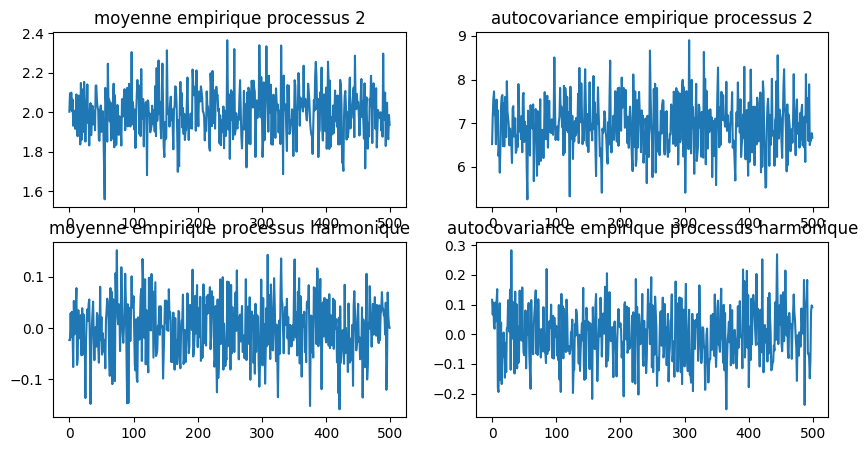

In [24]:
# On génére plusieurs échantillons avec le 2e processus

n_samples = 500
n = 1000

samples_Xab = [process_ab(sigma,n,a,b) for _ in range(n_samples)]
samples_X_harmonic = [process_harmonic(sigma,n,A,lamb) for _ in range(n_samples)]


means_Xab = [empirical_mean(X) for X in samples_Xab]
autocovs_Xab = [empirical_autocovariance(X) for X in samples_Xab]

means_X_harmonic = [empirical_mean(X) for X in samples_X_harmonic]
autocovs_X_harmonic = [empirical_autocovariance(X) for X in samples_X_harmonic]

fig, ax = plt.subplots(2, 2, figsize=(10, 5))

ax[0,0].plot(means_Xab)
ax[0,0].set_title("moyenne empirique processus 2")
ax[0,1].plot(autocovs_Xab)
ax[0,1].set_title("autocovariance empirique processus 2")
ax[1,0].plot(means_X_harmonic)
ax[1,0].set_title("moyenne empirique processus harmonique")
ax[1,1].plot(autocovs_X_harmonic)
ax[1,1].set_title("autocovariance empirique processus harmonique")

plt.show()

**Moyennes:** On observe quasiment un regroupement des différentes moyennes autour de 2, il y a beaucoup de valeurs proches de cette valeur.

**Autocovariance:** Il semble qu'il y ait une plus grande disparité des valeurs.

Question 4